<img src = "https://github.com/exponentialR/DL4CV/blob/main/media/BMC_Summer_Course_Deep_Learning_for_Computer_Vision.jpg?raw=true" alt='BMC Summer Course' width='300'/>

### BMC Summer Course: Deep Learning for Computer Vision, Neural Networks

Author: Samuel A.

### Utilities

Please run the cells below.

In [4]:
import numpy as np
import torch # the magical NN package
from torch import nn, optim # Backpropagtion and Gradient Descent

# Visualization
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt

torch.manual_seed(42)

In [5]:
#@title Helper Functions (for generating random dataset)

#Modified from https://github.com/tensorflow/playground/blob/master/src/dataset.ts

def generate_dataset1(n=200):
  np.random.seed(42)
  r1 = 2*np.random.rand(n)
  angle = np.random.rand((n))*2*np.pi
  x1 = r1*np.cos(angle)
  y1 = r1*np.sin(angle)
  data1 = np.asarray((x1,y1))

  r2 = 2*np.random.rand(n) +3
  angle2 = np.random.rand((n))*2*np.pi
  x2 = r2*np.cos(angle)
  y2 = r2*np.sin(angle)
  data2 = np.asarray((x2,y2))

  data = np.swapaxes(np.concatenate((data1,data2), axis =-1),0,1)
  labels = np.concatenate((np.zeros(n, dtype=int), np.ones(n, dtype=int)))

  #shuffle
  c = list(zip(data, labels))
  np.random.shuffle(c)
  data, labels = zip(*c)

  return np.asarray(data), np.asarray(labels)

def generate_dataset2(n=100):
  np.random.seed(42)
  def genSpiral(n, d, noise=0.01):
    x =[]
    y =[]
    for k in range(n):
      r = k/n*5
      t = 1.75*k/ n * 2 * np.pi + d
      x.append(r*np.sin(t) + (2*np.random.rand()-1) * noise)
      y.append(r*np.cos(t) + (2*np.random.rand()-1) * noise)
    return np.asarray(x), np.asarray(y)

  x1, y1 = genSpiral(n, 0)
  data1 = np.asarray((x1,y1))

  x2, y2 = genSpiral(n, np.pi)
  data2 = np.asarray((x2,y2))

  data = np.swapaxes(np.concatenate((data1,data2), axis =-1),0,1)
  labels = np.concatenate((np.zeros(n, dtype=int), np.ones(n, dtype=int)))

  #shuffle
  c = list(zip(data, labels))
  np.random.shuffle(c)
  data, labels = zip(*c)

  return np.asarray(data), np.asarray(labels)

#Introduction

Welcome to the tutorial on building a simple Neural Network



---



# Part 1: Introduction to Pytorch 🐍

Pytorch is a framework that allows you to build and train neural networks.  


**Why use a framework?**
We could implement neural networks using numpy. However, using packages such as PyTorch make it a lot easier as they have built-in functions. As you have seen in previous tutorials we train our models using gradient descent. Ideally we want to be able to create new models and automatically compute the gradients. This is what PyTorch and other deep learning frameworks give us that makes them so appealing, they reduce computing gradients to a simple function call!!

**Let's play around with PyTorch**
Below, we'll introduce you to some basic PyTorch operations. For those of you who are curious, the documentation can be found [here](https://pytorch.org/docs/stable/tensors.html). If you're stuck, we recommend just searching what you want to do in the documentation.

It's easy to convert arrays in numpy to "tensors" in PyTorch. First, let's **create** a numpy array:

In [6]:
y = np.array([0,1,1,1,0,0,0,0,1,1])
print("we've created: ", y)

we've created:  [0 1 1 1 0 0 0 0 1 1]


In Pytorch, we use what are called **tensors** rather than arrays. For the most part, they're very similar to a numpy array.

We can convert a numpy into a tensor torch by using the `torch.tensor` function as follows:

In [7]:
y_tensor = torch.tensor(y)
print("we've created a tensor now: ", y_tensor)

we've created a tensor now:  tensor([0, 1, 1, 1, 0, 0, 0, 0, 1, 1])


We can also create tensors without using numpy arrays. For example:

In [8]:
z_tensor = torch.tensor([0,0,0,0,0,1,1,1,1,1])
print("we've create this tensor now: ", z_tensor)

we've create this tensor now:  tensor([0, 0, 0, 0, 0, 1, 1, 1, 1, 1])


So now we know how to create tensors! If we're given a tensor, we might want to know about some of its attributes. For example, we may want to know the shape of a tensor. For this, we can use the `.shape` command:

In [9]:
y_shape = y_tensor.shape
print(y_shape)

torch.Size([10])


We can access an entry in the tensor in the same way as we did with numpy arrays. For example, to find the first and second element we call:

In [10]:
first_entry = y_tensor[0] # we use index 0 for the first element in Python
print("the first entry is: ", first_entry)

fifth_entry = y_tensor[1]
print("the second entry is: ", fifth_entry)

the first entry is:  tensor(0)
the second entry is:  tensor(1)


Here, we observe a difference with numpy arrrays ... everything is in tensors! In PyTorch, we don't get the entry but a tensor containing the value.
In general, torch tensors are very cool because they allow us to perform all kinds of operations:

In [11]:
# Compute the sum
y_tensor.sum()

tensor(5)

In [12]:
# Compute the mean using .mean()
y_tensor.float().mean()

tensor(0.5000)

Now you've familiarized yourself with tensors! It's time to do a couple of exercises.

**Task 1.1: Selecting a subset of the data**

Often in machine learning, we work with large amounts of data. Therefore we sometimes only want to work with subsets. For example, we may either want a couple of datapoints (a subset of the rows) or a couple of the variables (a subset of the columns).

The first task is therefore to **select a subset of the data from a tensor.** The original tensor, w, contains 100 rows and 100 columns.

* Hint: You can get the first and last $n$ elements of an array using `array[:n]` and `array[-n:]`

In [13]:
# We create a tensor that has 100 rows and 100 columns
torch.manual_seed(0)
w = torch.randn(100,100)
print(w.shape)

#TO-DO: select the first 10 rows of w
w_ = w[:10] #solution
w_ = w[:10, :]
print(w_.shape)

#TO-DO: select the last 10 columns of w
w_ = w[:,-10:]
print(w_.shape)

#TO-DO: select the element in row 2 and column 5
w_ = w[2, 5]
print(w_)

torch.Size([100, 100])
torch.Size([10, 100])
torch.Size([100, 10])
tensor(-1.2063)


You should get:



```
torch.Size([10, 100])
torch.Size([100, 10])
tensor(-1.2063)
```



**Task 1.2: Reshape a Tensor**

For neural networks, we often need to our tensors to be in specific shapes. As such, it's useful to be able to reshape a tensor. There are two functions built into Pytorch which allow you to do this: [reshape](https://pytorch.org/docs/stable/generated/torch.reshape.html) and [view](https://pytorch.org/docs/stable/tensor_view.html). We'll play around with the first.

In [14]:
# TO-DO reshape the tensor w into a 10 by 1000 tensor
w_ = w.reshape(10,1000)
print(w_.shape)

# TO-DO reshape the tensor w into a 1 by 10000 tensor
w_ = w.reshape(1,10000)
print(w_.shape)

torch.Size([10, 1000])
torch.Size([1, 10000])


In [ ]:
w.shape

torch.Size([100, 100])

You should see:



```
torch.Size([10, 1000])
torch.Size([1, 10000])
```



**Task 1.3: Computing Accuracy**

As we've seen in previous lectures, it can be useful to compute the accuracy to measure the performance of our model. Below, we'll implement a function that computes accuracy using PyTorch.

* Hint: You can use `==` to test if an array is similar (remember 1 means true and 0 means false):

```
[2, 3, 4] == [2, 4, 4]
> [1, 0, 1]
```


In [15]:
def accuracy(pred, y):
  #TO-DO compute the accuracy
  acc = (pred == y).float().mean() #solution
  return acc

In [16]:
y_tensor = torch.tensor([0, 1, 0, 1])
pred_tensor = torch.tensor([1, 1, 0, 1])
accuracy(pred_tensor, y_tensor)

tensor(0.7500)

In [17]:
print((pred_tensor == y_tensor))
print((pred_tensor == y_tensor).float())
(pred_tensor == y_tensor).float().mean()

tensor([False,  True,  True,  True])
tensor([0., 1., 1., 1.])


tensor(0.7500)

Your output for the above cell should be:

```
tensor(0.7500)
```




**Task 1.4: Matrix Multiplication**

Use `torch.matmul()` to compute a matrix multiplication.

In [18]:
torch.manual_seed(0)
X = torch.randn(5)
B = torch.randn((1,5))

#TO-DO: multiply the tensors X and B (i.e., compute Y = BX)
Y = torch.matmul(B,X)
print(Y)

tensor([-4.0709])


You should get

```
tensor([-4.0709])
```



**Stretch question**: can we compute Y = XB? If yes, does it give the same answer as  Y=BX? If not, why not?

In [19]:
torch.matmul(X, B)

RuntimeError: mat1 and mat2 shapes cannot be multiplied (1x5 and 1x5)

Congratulations! You've finished part I. 🎉  You're now familiar with the basic operations in PyTorch. Next, we'll use PyTorch to implement a neural network.



---



# Part 2: Implementing a Neural Network in Pytorch

The goal of this section to teach you how to implement a Neural Network $f$ and train it with gradient descent in PyTorch.

So let's recap on what we need:  
*   a Neural Network $f_{\theta}$ with *trainable* parameters (sometimes called weights) $\theta$,
*   a loss function $\mathcal{L}(x,y)$ (e.g. Binary Cross Entropy or MSE),
*   some input data $x$, and some output data $y$.

Training $f_{\theta}$ is performed using gradient decent, which keeps updating the parameters by an amount proportional to the negative gradient of the loss function:
$$\theta_{t+1} = \theta_t - \varepsilon\nabla \mathcal{L}(f_{\theta_t}(x),y)$$

This may sound like a lot at this stage, but we will see how PyTorch helps to focus on building good neural networks $f$ and does most of the work for us by providing us with built-in functions to compute the gradients and update the parameters.

Let's start by seeing how we can build a Neural Network!



## Building a Neural Network

Let us start by writing down the equation of a perceptron again:
$$ f(x) = \sigma(Wx + b) $$

*   $x$ is our input data (this is the input **vector** of size $n$)
*   $W$ is our weight matrix (these are the parameters we want to learn, this is of size $m \times n$)
*   $b$ is our bias term (these are the parameters we want to learn, this is of size $m$)
*   $\sigma$ is our *activation function*. In our example, we will use a ReLU activation for the non-final layers, and a Sigmoid activation for the output.

**Question** What size is the output of $f(x)$?

Let's start by building $f(x)$

In [20]:
# First we need to import PyTorch and the important functions
torch.manual_seed(0)
import torch
import torch.nn as nn

For the operation $Wx + b$, pytorch has very kindly implemented a function which handles all of the functionality and detail. All we need to do is do `my_layer = nn.Linear(n, m)` (this creates a random $W$ and $b$) and then doing `my_layer(x)` computes $Wx + b$.

Try making your own linear layer below:

In [21]:
m = 3
n = 4
x = torch.tensor([1.0, 2.0, 3.0, 4.0])
# TO DO add your own layer here
my_layer = nn.Linear(n, m)
# TO Do call your layer to perofrm Wx + b
output = my_layer(x)
# Now pass it through an activation, you may want to search the pytorch webiste to find sigmoid
fx = torch.sigmoid(output)
print(fx)

tensor([0.0659, 0.7859, 0.3032], grad_fn=<SigmoidBackward0>)


We can look at $W$ and $b$ using:

In [ ]:
print("W", my_layer.weight)
print("b", my_layer.bias)

W Parameter containing:
tensor([[-0.0037,  0.2682, -0.4115, -0.3680],
        [-0.1926,  0.1341, -0.0099,  0.3964],
        [-0.0444,  0.1323, -0.1511, -0.0983]], requires_grad=True)
b Parameter containing:
tensor([-0.4777, -0.3311, -0.2061], requires_grad=True)


Note how they say 'Parameter containing:', this is because PyTorch assumes we will be doing gradient descent on them.

### A brief intro on classes

To save us having to define our layers and functions in the main section of code, we can put them into a class. A class will allow us to create the `nn.Linear` first, and then allow us to compute $f(x)$ as many times as we want.

* Note: A class is a way to bundle functions and variables that conceptually belong together. In the case of a neural network, the `nn.Linear` layers (data/variables) and the forward function (functions) conceptually belong together and so are put in a class.  To save us from rewriting the same code over and over again we can "inherit" from another class. Basically all this means is that our new class consists of the old class plus all the new data and functions we will add.

In [22]:
class OneLayerNet(nn.Module):
    def __init__(self, input_dim, output_dim): # this function is called when we make a new OneLayerNet()
        super().__init__()
        print("You have made a new layer with input size %i and output size %i" % (input_dim, output_dim))
        self.my_layer_1 = nn.Linear(input_dim, output_dim)
        self.activation = nn.Sigmoid()

    def forward(self, x):
        print("Running forward pass!")
        hid1 = self.my_layer_1(x)
        output = self.activation(hid1)
        return output

input_d = 3
output_d = 4
my_one_layer_net = OneLayerNet(input_d, output_d) # This creates an 'instance' i.e. makes a OneLayerNet for you by calling OneLayerNet.__init__(input_dim, output_dim)


You have made a new layer with input size 3 and output size 4


We can then run our neural network by making some data and passing it through `forward()`

In [23]:
x = torch.tensor([1, 2, 3], dtype=torch.float)
print("f(x) = ", my_one_layer_net(x)) # this calls my_one_layer_net.forward(x)

Running forward pass!
f(x) =  tensor([0.7274, 0.3478, 0.8009, 0.7978], grad_fn=<SigmoidBackward0>)


## Chaining Linear layers together

We can chain these nn.Linear layers together to create a multi-layered perceptron (MLP):
$$ \text{MLP}(x) = f_2(f_1(x)). $$

where $f_1$ and $f_2$ are the two layers of the network.
Let's start by trying to implement this simple Neural Network:

## Task 2.1

Add another layer to the class below.

* Hint, you'll need to add a `nn.Linear()` in `def __init__(self, input_dim, output_dim)`, make sure your dimensions match!
* You will also need to make sure that this is updated in the `forward()` function.
* Make sure you include an activation function, we recommend `nn.ReLU()`


In [24]:
class MLP(nn.Module): # PyTorch needs to have nn.Module in brackets so it knows this is a neural network

    def __init__(self, input_dim, output_dim):
        super().__init__() # PyTorch needs this line otherwise it gets upset
        hidden_dim = 10

        self.layer1 = nn.Linear(input_dim, hidden_dim)
        # TO-DO: complete below
        self.layer2 = nn.Linear(hidden_dim, output_dim)
        self.activation1 = nn.ReLU()
        self.activation2 = nn.Sigmoid()

    def forward(self, x):
        #TO-DO: complete below
        hid1 = self.layer1(x)
        act1 = self.activation1(hid1)
        hid2 = self.layer2(act1)
        output = self.activation2(hid2)
        return output

In [25]:
torch.manual_seed(0)
input_d = 2
output_d = 1
model = MLP(input_d, output_d) # creating an instance of our MLP et voila!

#print a summary of the network
print(model)

x = torch.randn(input_d)
print("Output:", model(x))

MLP(
  (layer1): Linear(in_features=2, out_features=10, bias=True)
  (layer2): Linear(in_features=10, out_features=1, bias=True)
  (activation1): ReLU()
  (activation2): Sigmoid()
)
Output: tensor([0.4930], grad_fn=<SigmoidBackward0>)


The expected outputs should be:
```
MLP(
  (layer1): Linear(in_features=2, out_features=10, bias=True)
  (layer2): Linear(in_features=10, out_features=1, bias=True)
  (activation1): ReLU()
  (activation2): Sigmoid()
)
```
and
```
Output: tensor([0.4930], grad_fn=<SigmoidBackward>)
```

## Task 2.2

Play around with the input and output dimensions to see how it affects the structure of your neural network (use the code box above).

## Loss function and Optimizer

Loss functions tell our neural network how accurate they are. The ouput of the loss function is what we will compute the gradient on. Typically we choose our loss function based on the task from a common set of loss functions we know tend to work well. PyTorch has implemented most of them for us already (you can find a full list with explanations [here](https://pytorch.org/docs/stable/nn.html#loss-functions)), so all we have to do is call the loss function we want to use. We do this in the same way we created a linear layer. Search the [list](https://pytorch.org/docs/stable/nn.html#loss-functions) of loss functions to find one which would enable us to do binary classification and fill out the box below .

* Hint: it should be of the form `loss_function = nn.YourChosenLoss()`

In [26]:
# Task find a loss function to perform binary classification
loss_function = nn.BCELoss()

Run the code below to make sure you get the right answer

In [29]:
input = torch.tensor([0.1, 0.8, 0.3])
target = torch.tensor([0.0, 1.0, 0.0])
print(loss_function(input, target))

tensor(0.2284)


Answer: `tensor(0.2284)`

#### The Optimizer

Next we will create what is called an optimizer. The optimizer will deal with the parameter updates for us, i.e. finding all of the parameters and their gradients and updating them. This saves us from having to manually do it like in the logistic regression session.

We will use SGD, which is the simplest optimizer (torch.optim.SGD()). We need to tell it which network parameters (i.e. the weights of our nn.Linear layers) to update and also give it a learning rate.

```
optimizer = optim.SGD(model.parameters(), lr=1.0)
````

We can then update the parameters using:

```
optimizer.step()
```

**WARNING!!** You need to make sure you've called `loss.backward()` first!!!

Next we will create a dataset for you to play with. We will use the co-centric gaussian dataset, which you can generate by calling generate_dataset1()

We'll start with the co-centric dataset. You can always come back and play with the second if you finish early (just un-comment the final two lines below)

In [30]:
torch.manual_seed(0)
X_data,Y_data = generate_dataset1() # this generates the co-centric Gaussians dataset
X_data_test, Y_data_test = generate_dataset1(50)

# X,Y = generate_dataset2() #this generates the spiral dataset
# X_test, Y_test = generate_dataset2(50) #this generates the spiral dataset

Run the below cell to visualize the dataset. This is the same one you played around with before on the Tensorflow playground. Here, orange points are given label 1 and light blue points have label 0. The labelling is arbitrary and just used to distinguish between the classes.

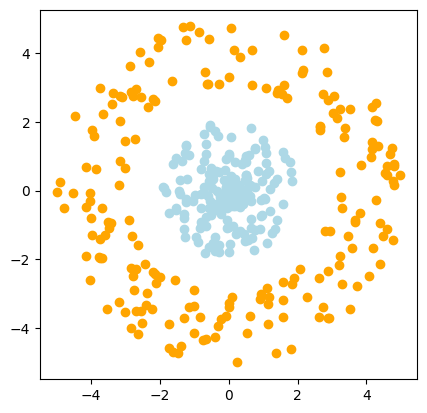

In [31]:
#Run this cell to visualize the dataset
fig = plt.figure()
ax = fig.add_subplot(111)

colors = ["lightblue", "orange"]
for cl in range(2):
  x1 = X_data[Y_data==cl,0]
  x2 = X_data[Y_data==cl,1]
  plt.plot(x1, x2, "o", color=colors[cl])
ax.set_aspect('equal')

In [32]:
# The cell below converts the data from numpy arrays into torch tensors
Y = torch.tensor(Y_data).view(len(Y_data),1).float()
X = torch.tensor(X_data).float()
Y_test = torch.tensor(Y_data_test).view(len(Y_data_test),1).float()
X_test = torch.tensor(X_data_test).float()

## Taking a gradient step

We are now ready to start training our neural network! We have all of the components in place:
* A neural network, which we access through `model(x)`.
* Our loss function `loss_function(preds, y)`.
* And our optimizer `optimizer`.

## Task 2.3
See if you can fill out the function below. This function will calculate the loss, compute the gradient and update our parameters,


In [33]:
# Task: define the training loop
def take_step(model, loss_function, data, optimizer):
    # unpacking our data
    x, labels = data

    # Forward pass
    # TO-DO: compute the predictions
    preds = model(x)

    # TO-DO: compute the loss for the prediction and corect labels
    loss = loss_function(preds, labels)

    # Backward pass
    # For each paramter PyTorch accumulates gradients in one place, so we need to make sure to initialise them to 0
    optimizer.zero_grad()

    # TO-DO: Compute the gradient
    loss.backward()

    # TO-DO: take a gradient step
    optimizer.step()

    return model, loss

Let's try to understand some of this magic a bit more:

```
optimizer.zero_grad()
```
Here we make sure the gradients are 0, we don't any bad gradients affecting our parameter updates. This is simply something we have to do because of the way PyTorch works. Don't worry too much about it, but make sure you include it in the future.

```
loss.backward()
```
This is where the magic happens and why we are using PyTorch. This automaically computes the gradients for us. PyTorch has kept track of each operation we have done to arrive at this loss value. Using this record of all the operations it can work out what the gradient is for each parameter used in the operations so far. It computes the gradients and stores them for the `optimizer` to use later.

```
optimizer.step()
```
This is where we update our parameters $\theta$ with the gradients $\nabla \mathcal{L}(f_{\theta_t}(x),y)$ we computed with `loss.backward()` and the learning rate given to the optimizer.

All that is left to do now is use all the code we have so far. We need to take multiple steps to update our parameters so let's use a for loop.

In [36]:
import time
model = MLP(2, 1)

optimizer = optim.SGD(model.parameters(), lr=0.1)

#Run the code
iterations = 100

for i in range(iterations):
  model, loss = take_step(model, loss_function, (X,Y), optimizer)
  if i % 10 == 0:
    print("Iteration %i, Loss %.3f" % (i, loss))
    time.sleep(2)


Iteration 0, Loss 0.731
Iteration 10, Loss 0.561
Iteration 20, Loss 0.512
Iteration 30, Loss 0.478
Iteration 40, Loss 0.450
Iteration 50, Loss 0.425
Iteration 60, Loss 0.401
Iteration 70, Loss 0.379
Iteration 80, Loss 0.358
Iteration 90, Loss 0.336


To test your model's performance, compute the accuracy on the test set:

In [ ]:
#TO-DO: compute the test accuracy (using X_test and Y_test)
predictions = model.forward(X_test)
predicted_labels = torch.round(predictions)
post_training_acc = accuracy(predicted_labels, Y_test)
print(post_training_acc)

tensor(0.9200)


## Visualize the decision boundary

After training the model, we can go through each $(x_1, x_2)$ pair in a fixed range and pass it through our pre-trained model to retrieve its corresponding prediction.

We use `torch.meshgrid` to generate the 2D grid and a single `> 0.5` threshold to classify the grid-points based on the prediction.

On top of it, we plot the original dataset for reference.



/usr/local/lib/python3.10/dist-packages/torch/functional.py:512: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at ../aten/src/ATen/native/TensorShape.cpp:3587.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


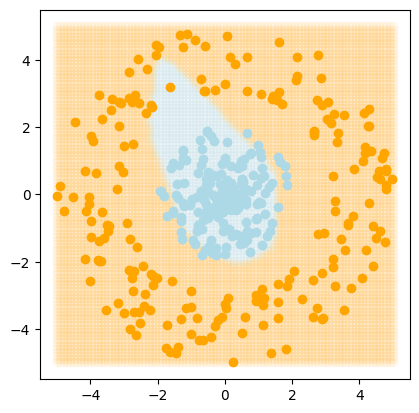

In [37]:
#Run this cell to visualize the dataset
fig = plt.figure()
ax = fig.add_subplot(111)

N = 100
X1, X2 = torch.meshgrid(torch.linspace(-5, 5, N), torch.linspace(-5, 5, N))
X_grid = torch.stack([X1.flatten(), X2.flatten()], dim=1)
Y_pred = (model.forward(X_grid) > 0.5).squeeze().int()

colors = ["lightblue", "orange"]
for cl in range(2):
  x1 = X_grid[Y_pred==cl,0]
  x2 = X_grid[Y_pred==cl,1]
  plt.plot(x1, x2, "o", color=colors[cl], alpha=0.05)

for cl in range(2):
  x1 = X_data[Y_data==cl,0]
  x2 = X_data[Y_data==cl,1]
  plt.plot(x1, x2, "o", color=colors[cl])

ax.set_aspect('equal')

## Task 2.4

Play around with the learning rate and the number of iterations in the code above to see how it affects your accuracy.